In [78]:
import chardet

def detect_encoding(file_path):
    with open(file_path, 'rb') as f:
        return chardet.detect(f.read(100000))['encoding']

df_member = pd.read_csv('Member_data.csv', encoding=detect_encoding('Member_data.csv'))
df_product = pd.read_csv('product_data.csv', encoding=detect_encoding('product_data.csv'))
df_sales = pd.read_csv('Sales_Data05.csv', encoding=detect_encoding('Sales_Data05.csv'))

In [79]:
df_member.head()

,Unnamed: 0,회원번호,회원상태,성별,나이,등록카드,결혼,구독여부,주소지,세부주소지
0,0,18764160,정상회원,여,68,농협중앙회,기혼,False,서울특별시,성동구
1,1,18792000,정상회원,남,83,연결앱결제,NaN,False,강원도,강릉시
2,2,18942336,정상회원,여,39,신한은행,기혼,False,인천광역시,중구
3,3,18949760,정상회원,여,73,기업은행,NaN,NaN,강원도,홍천군
4,4,19391488,정상회원,여,52,연결앱결제,기혼,False,대전광역시,중구


In [12]:
df_product.head()

,제품번호,물품명,물품대분류,물품중분류,상품중량
0,100021V2_0,2단무늬컵,식기/편백,자기,1p
1,100022V2_1,7곡딸기롤과자,과자,스낵,100g/10개입
2,100023V2_2,7곡참식,식사대용,선식/생식,700g
3,100024V2_3,가리비,생물수산,패류/갑각류,1.5kg
4,100025V2_3,가리비,생물수산,패류/갑각류,1kg


df_sales.head()

고객이탈률 - 탈퇴회원의 비율

In [69]:
# 전체 회원 수 계산
total_members = len(df_member)

# 탈퇴회원 수 계산 ("탈퇴" 상태인 회원 수)
churned_members = (df_member['회원상태'] == '탈퇴').sum()

# 계산
churn_rate = (churned_members / total_members) * 100

# 결과 출력 
print(f"탈퇴회원 비율: {churn_rate:.2f}%")

탈퇴회원 비율: 1.24%


고객이탈률 - 정상 회원중 최근2개월 구매이력이 없는 비율

In [61]:
import pandas as pd

# 주문일시 컬럼을 날짜 형식으로 변환
df_sales['주문일시'] = pd.to_datetime(df_sales['주문일시'], errors='coerce')

# 최근 구매한 고객 리스트 (2021-09-01 이후 구매한 고객)
recent_buyers = df_sales[df_sales['주문일시'] > '2021-09-01']['회원번호'].unique()

# 전체 회원 수 구하기
total_members = len(df_member)

# 구매 이력이 없는 고객 수 계산
inactive_members = total_members - len(df_member[df_member['회원번호'].isin(recent_buyers)])

# 비율 계산 및 출력
inactive_rate = (inactive_members / total_members) * 100
print(f"2021-09-01 이후 구매 이력이 없는 고객 비율: {inactive_rate:.2f}%")

2021-09-01 이후 구매 이력이 없는 고객 비율: 37.61%


월별 고객 주문횟수 분표

In [76]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm


plt.rc('font', family='Malgun Gothic') 
plt.rcParams['axes.unicode_minus'] = False

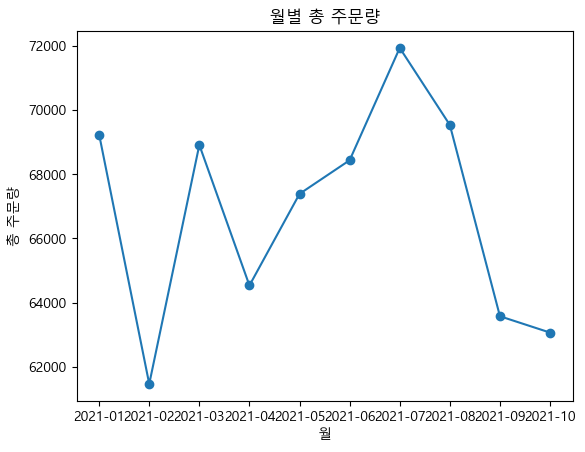

In [77]:
import pandas as pd
import matplotlib.pyplot as plt

# 주문일시를 datetime 형식으로 변환
df_sales['주문일시'] = pd.to_datetime(df_sales['주문일시'], errors='coerce')

# 월별 총 주문 횟수
pivot_table = df_sales.pivot_table(index=df_sales['주문일시'].dt.to_period('M'), 
                                   values='회원번호', aggfunc='count')

# 그래프 그리기
plt.plot(pivot_table.index.astype(str), pivot_table['회원번호'], marker='o')
plt.xlabel('월')
plt.ylabel('총 주문량')
plt.title('월별 총 주문량')
plt.show()

장기고객의 비율

고객별 활동기간 (첫 구매날짜 - 최근 구매날짜)  

최근 구매 날짜가 9월 1일 이후이면서 장기 고객(활동기간 3개월 이상)의 비율

In [98]:
# 주문일시를 datetime 형식으로 변환
df_sales['주문일시'] = pd.to_datetime(df_sales['주문일시'], errors='coerce')

# Pivot Table을 사용해 고객별 첫 구매일(min)과 최신 구매일(max) 계산
pivot_table = df_sales.pivot_table(index='회원번호', values='주문일시', aggfunc=['min', 'max'])

# 컬럼 이름 변경
pivot_table.columns = ['첫 구매일', '최신 구매일']

# 활동 기간(최신 구매일 - 첫 구매일) 계산
pivot_table['활동기간(일)'] = (pivot_table['최신 구매일'] - pivot_table['첫 구매일']).dt.days

# 최신 구매일이 2021-09-01 이후인 고객 필터링
recent_customers = pivot_table[pivot_table['최신 구매일'] > cutoff_date]

# 활동 기간이 3개월(90일) 이상인 고객 필터링
long_term_customers = recent_customers[recent_customers['활동기간(일)'] >= 90]

# 전체 고객 수 및 장기 고객 비율 계산
total_customers = len(pivot_table)
long_term_ratio = (len(long_term_customers) / total_customers) * 100

# 결과 출력
print(f"장기 고객 수: {len(long_term_customers)}명")
print(f"장기 고객 비율: {long_term_ratio:.2f}%")

장기 고객 수: 6759명
장기 고객 비율: 53.90%
